## Importing Libraries and Dataset

In [1]:
! pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
from datasets import load_dataset, Dataset
from transformers import pipeline, AutoTokenizer
import pandas as pd

# Load the dataset
ds = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Video_Games", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

Video_Games.jsonl:   0%|          | 0.00/2.68G [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

## Text Preprocessing

In [3]:
# taking a fraction of the dataset
ds_new = ds['full'].shuffle(seed=42).select(range(3000))
ds_new

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 3000
})

In [4]:
# Lowercasing
def lowercase_text(text):
  return text.lower()

ds_new = ds_new.map(lambda example: {'text': lowercase_text(example['text'])})
ds_new[0:20]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

{'rating': [2.0,
  5.0,
  5.0,
  1.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0],
 'title': ['Most don’t fit',
  'Five Stars',
  'Classic',
  'Stopped working in a week!',
  'This best wushu martial art game ever , i love it',
  'Five Stars',
  'Great buy!',
  'Broke after about 5-minutes of use',
  'Such a great gift for a switch fan!',
  'Great pad but has writing on lower right corner.',
  'Super adjustable',
  'Great keyboard',
  'Go Gamer!',
  'love it',
  'Love it!!!!!',
  'Five Stars',
  'Length is perfect for intended use.',
  'play it, then replay it best zombie game ever',
  'Amazing product',
  'Was this suppose to be a mobile app game?'],
 'text': ['most don’t fit',
  'they work great',
  'works like it should',
  'i really loved this until it stopped working after one week! very disappointed!',
  'this game have a lots of character and see different dressed, and cool graphic. there are so many styles  mar

In [5]:
# Removing HTML tags
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

ds_new = ds_new.map(lambda example: {'text': remove_html_tags(example['text'])})
ds_new[0:20]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

{'rating': [2.0,
  5.0,
  5.0,
  1.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0],
 'title': ['Most don’t fit',
  'Five Stars',
  'Classic',
  'Stopped working in a week!',
  'This best wushu martial art game ever , i love it',
  'Five Stars',
  'Great buy!',
  'Broke after about 5-minutes of use',
  'Such a great gift for a switch fan!',
  'Great pad but has writing on lower right corner.',
  'Super adjustable',
  'Great keyboard',
  'Go Gamer!',
  'love it',
  'Love it!!!!!',
  'Five Stars',
  'Length is perfect for intended use.',
  'play it, then replay it best zombie game ever',
  'Amazing product',
  'Was this suppose to be a mobile app game?'],
 'text': ['most don’t fit',
  'they work great',
  'works like it should',
  'i really loved this until it stopped working after one week! very disappointed!',
  'this game have a lots of character and see different dressed, and cool graphic. there are so many styles  mar

In [6]:
# Removing stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  words = text.split()
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)

ds_new = ds_new.map(lambda example: {'text': remove_stopwords(example['text'])})
ds_new[0:20]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

{'rating': [2.0,
  5.0,
  5.0,
  1.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0],
 'title': ['Most don’t fit',
  'Five Stars',
  'Classic',
  'Stopped working in a week!',
  'This best wushu martial art game ever , i love it',
  'Five Stars',
  'Great buy!',
  'Broke after about 5-minutes of use',
  'Such a great gift for a switch fan!',
  'Great pad but has writing on lower right corner.',
  'Super adjustable',
  'Great keyboard',
  'Go Gamer!',
  'love it',
  'Love it!!!!!',
  'Five Stars',
  'Length is perfect for intended use.',
  'play it, then replay it best zombie game ever',
  'Amazing product',
  'Was this suppose to be a mobile app game?'],
 'text': ['don’t fit',
  'work great',
  'works like',
  'really loved stopped working one week! disappointed!',
  'game lots character see different dressed, cool graphic. many styles martial art wushu learned. cool',
  'good product',
  'saw deal one coupon websites. aw

In [7]:
# Removing special characters
def remove_special_characters(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

ds_new = ds_new.map(lambda example: {'text': remove_special_characters(example['text'])})
ds_new[0:20]

Map:   0%|          | 0/3000 [00:00<?, ? examples/s]

{'rating': [2.0,
  5.0,
  5.0,
  1.0,
  5.0,
  5.0,
  5.0,
  1.0,
  5.0,
  4.0,
  5.0,
  4.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  1.0],
 'title': ['Most don’t fit',
  'Five Stars',
  'Classic',
  'Stopped working in a week!',
  'This best wushu martial art game ever , i love it',
  'Five Stars',
  'Great buy!',
  'Broke after about 5-minutes of use',
  'Such a great gift for a switch fan!',
  'Great pad but has writing on lower right corner.',
  'Super adjustable',
  'Great keyboard',
  'Go Gamer!',
  'love it',
  'Love it!!!!!',
  'Five Stars',
  'Length is perfect for intended use.',
  'play it, then replay it best zombie game ever',
  'Amazing product',
  'Was this suppose to be a mobile app game?'],
 'text': ['dont fit',
  'work great',
  'works like',
  'really loved stopped working one week disappointed',
  'game lots character see different dressed cool graphic many styles martial art wushu learned cool',
  'good product',
  'saw deal one coupon websites awesome d

## Sentiment Analysis

In [8]:
# Perform sentiment analysis on the sample
sentiment_analyzer = pipeline("sentiment-analysis", model="LiYuan/amazon-review-sentiment-analysis")
results = sentiment_analyzer(ds_new["text"], truncation=True)
results

config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/556 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.56M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': '1 star', 'score': 0.4656864404678345},
 {'label': '5 stars', 'score': 0.8415440917015076},
 {'label': '5 stars', 'score': 0.8026859760284424},
 {'label': '1 star', 'score': 0.36182472109794617},
 {'label': '5 stars', 'score': 0.6382122039794922},
 {'label': '5 stars', 'score': 0.633466899394989},
 {'label': '5 stars', 'score': 0.9271484017372131},
 {'label': '1 star', 'score': 0.5261486768722534},
 {'label': '5 stars', 'score': 0.8909521102905273},
 {'label': '4 stars', 'score': 0.47651851177215576},
 {'label': '5 stars', 'score': 0.9430696368217468},
 {'label': '5 stars', 'score': 0.7187602519989014},
 {'label': '5 stars', 'score': 0.8449157476425171},
 {'label': '5 stars', 'score': 0.8776081800460815},
 {'label': '5 stars', 'score': 0.9361884593963623},
 {'label': '4 stars', 'score': 0.48264795541763306},
 {'label': '5 stars', 'score': 0.9191062450408936},
 {'label': '5 stars', 'score': 0.7870417237281799},
 {'label': '5 stars', 'score': 0.9233225584030151},
 {'label': '1

In [9]:
# Calling the true rating labels
true_labels = ds_new['rating']  # Actual labels

# Convert the true labels to match the model's label format
def map_sentiment(rating):
  if rating == 1:
    return '1 star'  # negative sentiment
  elif rating == 2:
    return '2 stars'  # somewhat negative sentiment
  elif rating == 3:
    return '3 stars'  # neutral sentiment
  elif rating == 4:
    return '4 stars'  # somewhat positive sentiment
  else:
    return '5 stars'  # positive sentiment


true_labels_mapped = [map_sentiment(rating) for rating in true_labels]

# Predicted labels, ensure they are in the same format ('POSITIVE', 'NEGATIVE')
predicted_labels = [result['label'] for result in results]

# Create a DataFrame to compare true and predicted labels
comparison_df = pd.DataFrame({
    'True Label': true_labels_mapped,
    'Predicted Label': predicted_labels,
    'Confidence Score': [result['score'] for result in results]
})
comparison_df

,True Label,Predicted Label,Confidence Score
0,2 stars,1 star,0.465686
1,5 stars,5 stars,0.841544
2,5 stars,5 stars,0.802686
3,1 star,1 star,0.361825
4,5 stars,5 stars,0.638212
...,...,...,...
2995,5 stars,5 stars,0.588345
2996,4 stars,2 stars,0.338387
2997,4 stars,3 stars,0.429346
2998,5 stars,5 stars,0.878798


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy
accuracy = accuracy_score(true_labels_mapped, predicted_labels)
f"Accuracy: {accuracy * 100:.2f}%"

'Accuracy: 69.07%'

In [11]:
# Modify the predicted labels to be numeric
label_mapping = {
    '1 star': 1,
    '2 stars': 2,
    '3 stars': 3,
    '4 stars': 4,
    '5 stars': 5,
}
predicted_labels_numeric = [label_mapping.get(label, -1) for label in predicted_labels]

# Option 1: If true_labels are integers (1, 2, 3, 4, 5)
cm = confusion_matrix(true_labels, predicted_labels_numeric, labels=list(label_mapping.values()))  # Use list(label_mapping.values()) to provide the correct label order
print(cm)

[[ 257    2    6   12  115]
 [  84    6   10   11   52]
 [  38    2   28   26  131]
 [  29    1   15   77  280]
 [  56    1   12   45 1704]]


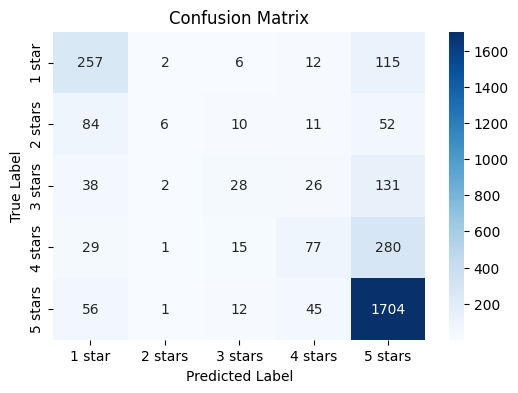

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'], yticklabels=['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Results and Summary**

The model achieved a 69.07% accuracy in predicting star ratings for Amazon video game reviews. It correctly classified around 69 out of 100 reviews. While a decent accuracy, the confusion matrix reveals further details: The model excels at identifying 5-star reviews, with **around 1700 correct predictions.** However, it struggles with nuances, often misclassifying 3-star and 4-star reviews, leading to approximately 300 and 400 misclassifications in these categories, respectively. Despite these challenges, the overall accuracy and strong performance in identifying positive sentiment demonstrate the model's potential for practical use. Through further refinement, we would be able to address the misclassifications and achieve higher accuracy across all star rating categories.

## Trying with distilroBERTa

In [13]:
# trying with distilroBERTa
roberta_analyzer = pipeline("sentiment-analysis", model='mrm8488/distilroberta-finetuned-financial-news-sentiment-analysis')
roberta_results = roberta_analyzer(ds_new["text"], truncation=True)
roberta_results

config.json:   0%|          | 0.00/933 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/328M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/333 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

[{'label': 'neutral', 'score': 0.9998482465744019},
 {'label': 'positive', 'score': 0.749080240726471},
 {'label': 'neutral', 'score': 0.9998716115951538},
 {'label': 'negative', 'score': 0.9805663824081421},
 {'label': 'neutral', 'score': 0.9997804760932922},
 {'label': 'neutral', 'score': 0.9998030066490173},
 {'label': 'positive', 'score': 0.9955456256866455},
 {'label': 'positive', 'score': 0.9860738515853882},
 {'label': 'positive', 'score': 0.5274348855018616},
 {'label': 'neutral', 'score': 0.7522766590118408},
 {'label': 'neutral', 'score': 0.5434020757675171},
 {'label': 'positive', 'score': 0.9109683036804199},
 {'label': 'neutral', 'score': 0.9998438358306885},
 {'label': 'neutral', 'score': 0.9998002648353577},
 {'label': 'neutral', 'score': 0.9998319149017334},
 {'label': 'neutral', 'score': 0.9995409250259399},
 {'label': 'positive', 'score': 0.9928376078605652},
 {'label': 'positive', 'score': 0.9689213633537292},
 {'label': 'neutral', 'score': 0.7550569772720337},
 {'la

In [30]:
# Assuming the dataset has a 'label' column with the true sentiment labels
roberta_true_labels = ds_new['rating']  # Actual labels

# Convert the true labels to match the model's label format
roberta_true_labels_mapped = [
    'negative' if rating <= 2.0 else 'positive' if rating >= 5.0 else 'neutral'
    for rating in roberta_true_labels
]

# Predicted labels, ensure they are in the same format ('POSITIVE', 'NEGATIVE')
roberta_predicted_labels = [result['label'] for result in roberta_results]

# Create a DataFrame to compare true and predicted labels
roberta_comparison_df = pd.DataFrame({
    'True Label': roberta_true_labels_mapped,
    'Predicted Label': roberta_predicted_labels,
    'Confidence Score': [result['score'] for result in roberta_results]
})
roberta_comparison_df

,True Label,Predicted Label,Confidence Score
0,negative,neutral,0.999848
1,positive,positive,0.749080
2,positive,neutral,0.999872
3,negative,negative,0.980566
4,positive,neutral,0.999780
...,...,...,...
2995,positive,positive,0.997205
2996,neutral,negative,0.996508
2997,neutral,negative,0.996127
2998,positive,positive,0.820883


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate roberta accuracy
roberta_accuracy = accuracy_score(roberta_true_labels_mapped, roberta_predicted_labels)
f"Accuracy: {roberta_accuracy * 100:.2f}%"

'Accuracy: 37.90%'

In [32]:
# Generate the confusion matrix
roberta_matrix = confusion_matrix(roberta_true_labels_mapped, roberta_predicted_labels, labels=['positive', 'negative', 'neutral'])
roberta_matrix

array([[ 622,   40, 1156],
       [  64,  153,  338],
       [ 207,   58,  362]])

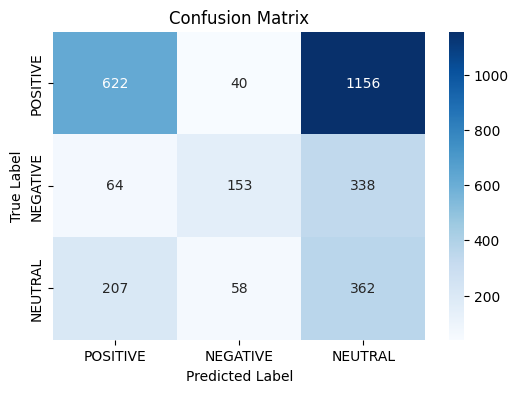

In [33]:
# roberta confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(roberta_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['POSITIVE', 'NEGATIVE', 'NEUTRAL'], yticklabels=['POSITIVE', 'NEGATIVE', 'NEUTRAL'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Summary and Results**

When using the DistilRoBERTa model, we achieved quite a low accuracy of 37.90%, indicating poor overall performance. The confusion matrix shows the model performs best with positive reviews, correctly classifying 622, but it misclassifies 1156 as neutral and 40 as negative. For negative reviews, only 153 are correctly identified, while 64 are misclassified as positive a Text fett markierennd 338 as neutral. The model struggles significantly with neutral reviews, correctly classifying just 362, while 207 are misclassified as positive and 58 as negative.

These results suggest that the model has a bias toward predicting positive and neutral sentiments while struggling to correctly identify negative and neutral reviews. This suggests a need for further fine-tuning on the dataset and potentially better handling of class imbalances to improve performance.